
The LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
# Load dataset as train and test sets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# set numeric type to flot(32) from uint8
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Normalize value to [0,1]
x_train /= 255
x_test /= 255

# transform labels to one-hot encoding
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [3]:
from keras.models import Sequential
from keras import models,layers
import keras

model = Sequential()
# c1 Convolutional layer
model.add(layers.Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(28,28,1),padding='same'))
# s2 pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))
# c3 Convolutional layer
model.add(layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'))
# s4 pooling layer
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
# c5 fully connected Convolutional layer
model.add(layers.Conv2D(120,kernel_size=(5,5),strides=(1,1),activation='tanh',padding='valid'))
# fc6 fully connected layer
model.add(layers.Flatten())
# output layer with softmax axctivation
model.add(layers.Dense(84,activation='tanh'))
# compile the model
model.add(layers.Dense(10,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics=['accuracy'])


In [4]:
hist = model.fit(x=x_train,y=y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
469/469 [==============================] - 88s 186ms/step - loss: 0.6976 - accuracy: 0.8257 - val_loss: 0.3385 - val_accuracy: 0.9069
Epoch 2/10
469/469 [==============================] - 87s 184ms/step - loss: 0.3117 - accuracy: 0.9110 - val_loss: 0.2626 - val_accuracy: 0.9264
Epoch 3/10
469/469 [==============================] - 87s 185ms/step - loss: 0.2550 - accuracy: 0.9273 - val_loss: 0.2226 - val_accuracy: 0.9359
Epoch 4/10
469/469 [==============================] - 87s 186ms/step - loss: 0.2205 - accuracy: 0.9366 - val_loss: 0.1977 - val_accuracy: 0.9432
Epoch 5/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1956 - accuracy: 0.9445 - val_loss: 0.1774 - val_accuracy: 0.9494
Epoch 6/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1766 - accuracy: 0.9503 - val_loss: 0.1617 - val_accuracy: 0.9531
Epoch 7/10
469/469 [==============================] - 87s 186ms/step - loss: 0.1611 - accuracy: 0.9549 - val_loss: 0.1492 - val_ac

In [5]:
test_score = model.evaluate(x_test,y_test)
print("Test loss{:.4f},accuracy {:.2f} %".format(test_score[0],test_score[1]*100))

313/313 [==============================] - 7s 21ms/step - loss: 0.1199 - accuracy: 0.9665
Test loss0.1199,accuracy 96.65 %


Text(0, 0.5, 'acc')

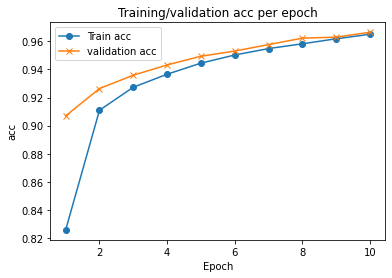

In [8]:
import matplotlib.pyplot as plt

f,ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'],'o-')
ax.plot([None] + hist.history['val_accuracy'],'x-')
# plot legend and use the best location automatically: loc=0
ax.legend(['Train acc','validation acc'],loc=0)
ax.set_title('Training/validation acc per epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'loss')

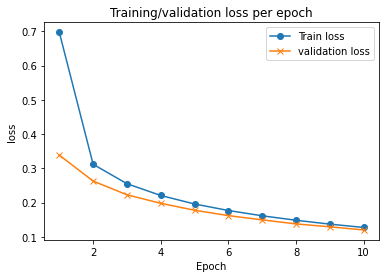

In [9]:
import matplotlib.pyplot as plt

f,ax = plt.subplots()
ax.plot([None] + hist.history['loss'],'o-')
ax.plot([None] + hist.history['val_loss'],'x-')
# plot legend and use the best location automatically: loc=0
ax.legend(['Train loss','validation loss'],loc=0)
ax.set_title('Training/validation loss per epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')